In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV file
df = pd.read_csv('processed_emg_data.csv')
df.head(5)

,rms,mav,zc,ssc,wavelength,participant,muscle_group
0,504.424695,248.465357,26904,44941,1.582249e+07,subject 1,biceps-isom
1,1290.132435,489.273669,25743,45470,2.881425e+07,subject 1,biceps-isot
2,1402.743278,582.060388,24883,42973,4.215697e+07,subject 1,triceps-isot
3,1139.196350,511.531727,25936,45916,4.689074e+07,subject 1,triceps-isom
4,1285.079960,575.962833,32915,50139,6.202426e+07,subject 1,Gastrocnemius-Medialis-isom


In [4]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(df[['rms', 'mav', 'zc', 'ssc', 'wavelength']])


In [5]:
# Encode labels
df['muscle_group'] = LabelEncoder().fit_transform(df['muscle_group'])
df.head(5)

,rms,mav,zc,ssc,wavelength,participant,muscle_group
0,504.424695,248.465357,26904,44941,1.582249e+07,subject 1,4
1,1290.132435,489.273669,25743,45470,2.881425e+07,subject 1,5
2,1402.743278,582.060388,24883,42973,4.215697e+07,subject 1,7
3,1139.196350,511.531727,25936,45916,4.689074e+07,subject 1,6
4,1285.079960,575.962833,32915,50139,6.202426e+07,subject 1,0


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, df['muscle_group'], test_size=0.2, random_state=42)

In [7]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.40540540540540543


In [8]:
# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.2972972972972973


In [9]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm= confusion_matrix(y_test, y_pred_svm)

# Confusion matrix

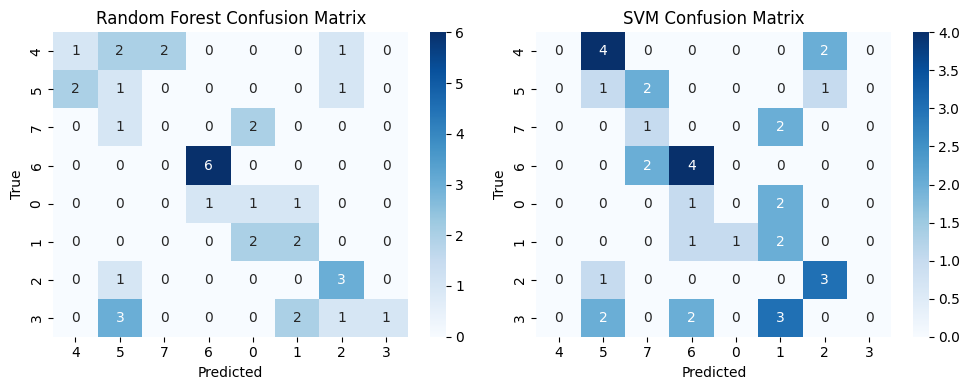

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot Random Forest confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=df['muscle_group'].unique(), yticklabels=df['muscle_group'].unique())
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot SVM confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1], 
            xticklabels=df['muscle_group'].unique(), yticklabels=df['muscle_group'].unique())
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()